# Importing Important Libraries For Different Tasks

In [5]:
# Importing important Libraries necessary libraries
import pandas as pd # To read the dataset through library which is called pandaa
import numpy as np #To import numpy for the numbering data
from sklearn.metrics import mean_squared_error, r2_score # To import the library to find the mean squared error
from sklearn.model_selection import train_test_split  # For dividing the data into train test split
from sklearn.preprocessing import StandardScaler   # For standardization of the data
from sklearn.linear_model import LogisticRegression # Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV   # The library which will be used for to find the best param
import matplotlib.pyplot as plt # The library which will be used for drawinf different plot and some other tasks
import seaborn as sns   # The library which will be used for the purpose of visulaization

# Load the dataset for pre-processing and to extract meaningfull information for my report

In [9]:
# Load the data
data = pd.read_csv('normalized_expression_data.csv', index_col=0)
data['target'] = np.random.randint(0, 2, size=len(data))
# To check the data just for understaning like columns and values in it
data.head()

,X1.CEL,X10.CEL,X11.CEL,X12.CEL,X13.CEL,X14.CEL,X15.CEL,X16.CEL,X17.CEL,X18.CEL,...,X2.CEL,X20.CEL,X3.CEL,X4.CEL,X5.CEL,X6.CEL,X7.CEL,X8.CEL,X9.CEL,target
11715100_at,4.910698,4.155685,4.088218,4.000970,3.839209,3.796522,3.744408,4.401068,3.744605,4.175924,...,4.757387,4.203475,4.994587,5.161641,4.180856,3.921129,4.507485,4.719071,3.994982,0
11715101_s_at,7.116163,6.700438,6.531448,6.426322,6.167636,6.264664,6.393983,6.885255,6.165253,6.041182,...,7.549855,6.370912,7.376626,7.645856,7.069460,6.530064,7.058121,7.953475,6.410618,1
11715102_x_at,4.767127,4.212240,4.013923,4.011976,3.778939,3.762108,3.839009,4.432945,4.010863,4.054125,...,4.987592,4.151917,4.870604,5.274334,4.464598,4.078651,4.601269,4.739102,4.024305,1
11715103_x_at,5.394218,5.132054,5.367695,5.318522,5.797511,5.364685,5.345365,5.463888,5.300243,5.696798,...,5.618655,5.614311,5.614563,6.101941,5.584576,5.359894,5.623862,5.741161,5.132938,1
11715104_s_at,6.085474,5.579341,5.106184,5.202225,4.932371,5.032518,5.374510,5.944778,4.948527,4.930927,...,6.669939,5.189793,6.397308,6.798732,6.143295,5.511504,6.079674,7.277054,5.415568,0


From the above data we know that the target column contains two values one is 0 and the other one is 1. 0 respresnt the non defective gene and 1 represent the defective gene which give us pretty precious information for writing the report which is in different file.

In [10]:
# Assume the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Storing the data in two variables x and y. X stored all the columns except the last one.
y = data.iloc[:, -1]   # Storing the data in the varaible y. So y store the data of the last column which is target.
print(y) # To verify the data in different variables.

11715100_at         0
11715101_s_at       1
11715102_x_at       1
11715103_x_at       1
11715104_s_at       0
                   ..
ERCC-00168-01_at    1
ERCC-00170-01_at    1
ERCC-00171-01_at    1
ERCC-00172-01_at    1
ERCC-00176-01_at    1
Name: target, Length: 49495, dtype: int64


The dataset is stored into two variables. One is called dependent(y)and independent column(x). The dependent column is called "TARGET" variable and rest of them are called independent. So the above information verifed that column target is stored in the variable "y".

In [11]:
print(data.info()) # To check the dataset for the different information such as data type, null values and columns.

<class 'pandas.core.frame.DataFrame'>
Index: 49495 entries, 11715100_at to ERCC-00176-01_at
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X1.CEL   49495 non-null  float64
 1   X10.CEL  49495 non-null  float64
 2   X11.CEL  49495 non-null  float64
 3   X12.CEL  49495 non-null  float64
 4   X13.CEL  49495 non-null  float64
 5   X14.CEL  49495 non-null  float64
 6   X15.CEL  49495 non-null  float64
 7   X16.CEL  49495 non-null  float64
 8   X17.CEL  49495 non-null  float64
 9   X18.CEL  49495 non-null  float64
 10  X19.CEL  49495 non-null  float64
 11  X2.CEL   49495 non-null  float64
 12  X20.CEL  49495 non-null  float64
 13  X3.CEL   49495 non-null  float64
 14  X4.CEL   49495 non-null  float64
 15  X5.CEL   49495 non-null  float64
 16  X6.CEL   49495 non-null  float64
 17  X7.CEL   49495 non-null  float64
 18  X8.CEL   49495 non-null  float64
 19  X9.CEL   49495 non-null  float64
 20  target   49495 non-null  int64  
d

In above cell, we checked the null values, data type, column name, number of non null values in all columns. We also checked the total column count which is 21 for the better understanding of data for the report writing. 

In [5]:
# Check for missing values
print(data.isnull().sum())

X1.CEL     0
X10.CEL    0
X11.CEL    0
X12.CEL    0
X13.CEL    0
X14.CEL    0
X15.CEL    0
X16.CEL    0
X17.CEL    0
X18.CEL    0
X19.CEL    0
X2.CEL     0
X20.CEL    0
X3.CEL     0
X4.CEL     0
X5.CEL     0
X6.CEL     0
X7.CEL     0
X8.CEL     0
X9.CEL     0
target     0
dtype: int64


In the above cell we did double check for looking null values in every columns. Which clearly showed that there are no null values in all columns included Target column.

In [12]:
# Checking the range of each column means minimum value and maximum values
ranges = data.describe().loc[['min', 'max']]
print(ranges)

        X1.CEL    X10.CEL    X11.CEL    X12.CEL    X13.CEL    X14.CEL  \
min   1.899926   1.877110   1.805039   1.880500   1.747918   1.848308   
max  13.966705  13.959987  14.006269  13.999539  13.924158  13.959628   

       X15.CEL    X16.CEL    X17.CEL    X18.CEL  ...     X2.CEL    X20.CEL  \
min   1.904334   1.879662   1.751569   1.859424  ...   1.953234   1.749015   
max  13.914492  13.956132  13.935683  13.962916  ...  13.930625  13.916690   

        X3.CEL     X4.CEL     X5.CEL     X6.CEL     X7.CEL     X8.CEL  \
min   1.983891   1.938818   1.923111   1.919209   1.896404   1.936405   
max  13.914748  13.943210  13.950626  13.954380  13.959987  14.024743   

        X9.CEL  target  
min   1.842940     0.0  
max  13.986532     1.0  

[2 rows x 21 columns]


I checked the minimum and maximum values in the dataset which shows that minimum values 1 and maximum value is 13.98. 

In [14]:
# Compute the mean expression for each gene
mean_expression = data.drop('target', axis=1).mean()

In [17]:
# Define a target variable where gene expression greater than the mean corresponds to cancer (1) and lower to non-cancer (0)
for gene in data.columns[:-1]:  # Exclude 'target' column
    data['target'] = (data[gene] > mean_expression[gene]).astype(int)
# Alternatively, use the median value instead of mean if the data distribution is skewed
data

,X1.CEL,X10.CEL,X11.CEL,X12.CEL,X13.CEL,X14.CEL,X15.CEL,X16.CEL,X17.CEL,X18.CEL,...,X2.CEL,X20.CEL,X3.CEL,X4.CEL,X5.CEL,X6.CEL,X7.CEL,X8.CEL,X9.CEL,target
11715100_at,4.910698,4.155685,4.088218,4.000970,3.839209,3.796522,3.744408,4.401068,3.744605,4.175924,...,4.757387,4.203475,4.994587,5.161641,4.180856,3.921129,4.507485,4.719071,3.994982,0
11715101_s_at,7.116163,6.700438,6.531448,6.426322,6.167636,6.264664,6.393983,6.885255,6.165253,6.041182,...,7.549855,6.370912,7.376626,7.645856,7.069460,6.530064,7.058121,7.953475,6.410618,1
11715102_x_at,4.767127,4.212240,4.013923,4.011976,3.778939,3.762108,3.839009,4.432945,4.010863,4.054125,...,4.987592,4.151917,4.870604,5.274334,4.464598,4.078651,4.601269,4.739102,4.024305,0
11715103_x_at,5.394218,5.132054,5.367695,5.318522,5.797511,5.364685,5.345365,5.463888,5.300243,5.696798,...,5.618655,5.614311,5.614563,6.101941,5.584576,5.359894,5.623862,5.741161,5.132938,0
11715104_s_at,6.085474,5.579341,5.106184,5.202225,4.932371,5.032518,5.374510,5.944778,4.948527,4.930927,...,6.669939,5.189793,6.397308,6.798732,6.143295,5.511504,6.079674,7.277054,5.415568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00168-01_at,2.849836,2.698310,2.502351,2.467758,2.546129,2.580397,2.540730,2.754620,2.586265,2.522718,...,2.810902,2.457997,3.017398,3.205125,2.674870,2.700116,2.882481,3.199340,2.542911,0
ERCC-00170-01_at,2.449851,2.409717,2.426028,2.265732,2.374807,2.340888,2.368380,2.280695,2.472885,2.562116,...,2.516274,2.419215,2.548082,2.662005,2.506330,2.364254,2.633243,2.519955,2.379074,0
ERCC-00171-01_at,3.070683,2.870975,2.735031,2.807274,2.795962,2.789847,2.640667,3.039611,2.696238,2.771087,...,3.081552,2.699530,2.995890,3.466074,3.141903,3.010147,3.114334,3.553765,2.786057,0
ERCC-00172-01_at,3.207477,2.866111,2.768886,2.877083,2.773826,2.753977,2.710193,3.247367,2.974621,2.823492,...,3.674112,2.763178,3.150180,3.732281,3.043058,2.929722,3.282267,3.268584,2.943299,0


# Train Test Split

In [18]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print(X_train.info()) # Checking the dataset after train test split

<class 'pandas.core.frame.DataFrame'>
Index: 39596 entries, 11742029_a_at to 11730895_at
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X1.CEL   39596 non-null  float64
 1   X10.CEL  39596 non-null  float64
 2   X11.CEL  39596 non-null  float64
 3   X12.CEL  39596 non-null  float64
 4   X13.CEL  39596 non-null  float64
 5   X14.CEL  39596 non-null  float64
 6   X15.CEL  39596 non-null  float64
 7   X16.CEL  39596 non-null  float64
 8   X17.CEL  39596 non-null  float64
 9   X18.CEL  39596 non-null  float64
 10  X19.CEL  39596 non-null  float64
 11  X2.CEL   39596 non-null  float64
 12  X20.CEL  39596 non-null  float64
 13  X3.CEL   39596 non-null  float64
 14  X4.CEL   39596 non-null  float64
 15  X5.CEL   39596 non-null  float64
 16  X6.CEL   39596 non-null  float64
 17  X7.CEL   39596 non-null  float64
 18  X8.CEL   39596 non-null  float64
 19  X9.CEL   39596 non-null  float64
dtypes: float64(20)
memory usage: 6.3+ MB


The above cell shows the dataset is divided into training and test. 20% data is kept for the test purpose and 80% data is kept will be used for training the model which later the model will be trained by 80% of the data and will be tested by 20% of the data.

In [20]:
print(X_test.info()) # Checking the dataset after train test split

<class 'pandas.core.frame.DataFrame'>
Index: 9899 entries, 11758723_at to 11739729_a_at
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X1.CEL   9899 non-null   float64
 1   X10.CEL  9899 non-null   float64
 2   X11.CEL  9899 non-null   float64
 3   X12.CEL  9899 non-null   float64
 4   X13.CEL  9899 non-null   float64
 5   X14.CEL  9899 non-null   float64
 6   X15.CEL  9899 non-null   float64
 7   X16.CEL  9899 non-null   float64
 8   X17.CEL  9899 non-null   float64
 9   X18.CEL  9899 non-null   float64
 10  X19.CEL  9899 non-null   float64
 11  X2.CEL   9899 non-null   float64
 12  X20.CEL  9899 non-null   float64
 13  X3.CEL   9899 non-null   float64
 14  X4.CEL   9899 non-null   float64
 15  X5.CEL   9899 non-null   float64
 16  X6.CEL   9899 non-null   float64
 17  X7.CEL   9899 non-null   float64
 18  X8.CEL   9899 non-null   float64
 19  X9.CEL   9899 non-null   float64
dtypes: float64(20)
memory usage: 1.6+ MB
N

The above cell shows test data which will be used for testing the model on it after train test split. 

In [25]:
# Standardizing the features for the model for the best outcome and best prediction on the normalized data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_test_scaled # Checking the dataset to verify that is it scaled or not

array([[-0.30633514, -0.32568154, -0.1014224 , ..., -0.30282489,
         0.09672898, -0.24817369],
       [-0.30940294, -0.59961124, -0.6077419 , ..., -0.45309923,
        -0.01307464, -0.68357622],
       [ 0.14177955,  0.27766119,  0.4974514 , ...,  0.0850092 ,
        -0.14933995,  0.33867939],
       ...,
       [-0.95872166, -0.55144695, -0.53762292, ..., -0.8613842 ,
        -0.94873436, -0.50102003],
       [ 0.42916917,  0.19107409,  0.04485977, ...,  0.44248415,
         0.74319392, -0.01377484],
       [ 1.67825876,  1.68304004,  1.78031385, ...,  1.63898504,
         1.09035186,  1.68781885]])

So the above shows  that data normalized between 0 and -1 for training the model for best output and accuracy because the model work pretty well on the normalized

# Linear Regression Model

In [27]:
#1. Training Linear Regression model on the scaled training data
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
# making Predictions on the test scaled data
y_pred_lr = lr_model.predict(X_test_scaled)
print(y_pred_lr)

[0.50431929 0.4885312  0.4993505  ... 0.50243169 0.49798817 0.48061189]


In [31]:
# Evaluate Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression Mean Squared Error: {mse_lr}')
print(f'Linear Regression R^2 Score: {r2_lr}')

Linear Regression Mean Squared Error: 0.2501144672680388
Linear Regression R^2 Score: -0.0005704445035565886


linear regression model is not too bad as the mean sqaured is 0.25.

# Random Forest Regressor

In [34]:
# 2. Random Forest Regressor
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)

In [35]:
# Hyperparameter tuning for Random Forest
param_dist_rf = {
    'n_estimators': [10, 50],  # Reduced number of estimators
    'max_depth': [5, 10],       # Limit the max depth
    'max_features': ['sqrt'],    # Using sqrt of features
}

rf_search = RandomizedSearchCV(rf_model, param_dist_rf, n_iter=5, scoring='neg_mean_squared_error', cv=3, random_state=42)
rf_search.fit(X_train_scaled, y_train)

# Best model
best_rf_model = rf_search.best_estimator_

# Predictions
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Evaluate Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R^2 Score: {r2_rf}')

/Users/zeshan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Forest Mean Squared Error: 0.250188600150242
Random Forest R^2 Score: -0.0008670093992566574


The above Regressor is not to bad as linear regression becuase the mean squared error is almost same as small difference after decimal

# Gradient Boosting Regressor

In [36]:
# 3. Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning for Gradient Boosting
param_dist_gb = {
    'n_estimators': [10, 50],  # Reduced number of estimators
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],       # Limit the max depth
}

gb_search = RandomizedSearchCV(gb_model, param_dist_gb, n_iter=5, scoring='neg_mean_squared_error', cv=3, random_state=42)
gb_search.fit(X_train_scaled, y_train)

# Best model
best_gb_model = gb_search.best_estimator_

# Predictions
y_pred_gb = best_gb_model.predict(X_test_scaled)

# Evaluate Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting R^2 Score: {r2_gb}')


Gradient Boosting Mean Squared Error: 0.25000082200863605
Gradient Boosting R^2 Score: -0.00011581231470958464


# AdaBoost Regressor

In [45]:
# 4. AdaBoost Regressor
ab_model = AdaBoostRegressor(random_state=42)

# Hyperparameter tuning for AdaBoost
param_dist_ab = {
    'n_estimators': [10, 50],  # Reduced number of estimators
    'learning_rate': [0.01, 0.1],
}

ab_search = RandomizedSearchCV(ab_model, param_dist_ab, n_iter=5, scoring='neg_mean_squared_error', cv=3, random_state=42)
ab_search.fit(X_train_scaled, y_train)

# Best model
best_ab_model = ab_search.best_estimator_

# Predictions
y_pred_ab = best_ab_model.predict(X_test_scaled)

# Evaluate AdaBoost model
mse_ab = mean_squared_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

print(f'AdaBoost Mean Squared Error: {mse_ab}')
print(f'AdaBoost R^2 Score: {r2_ab}')



/Users/zeshan/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


AdaBoost Mean Squared Error: 0.2509004742536085
AdaBoost R^2 Score: -0.0037148262241533114


# Visualization Of Data Through Different Graphs 

# Linear Regression Graph

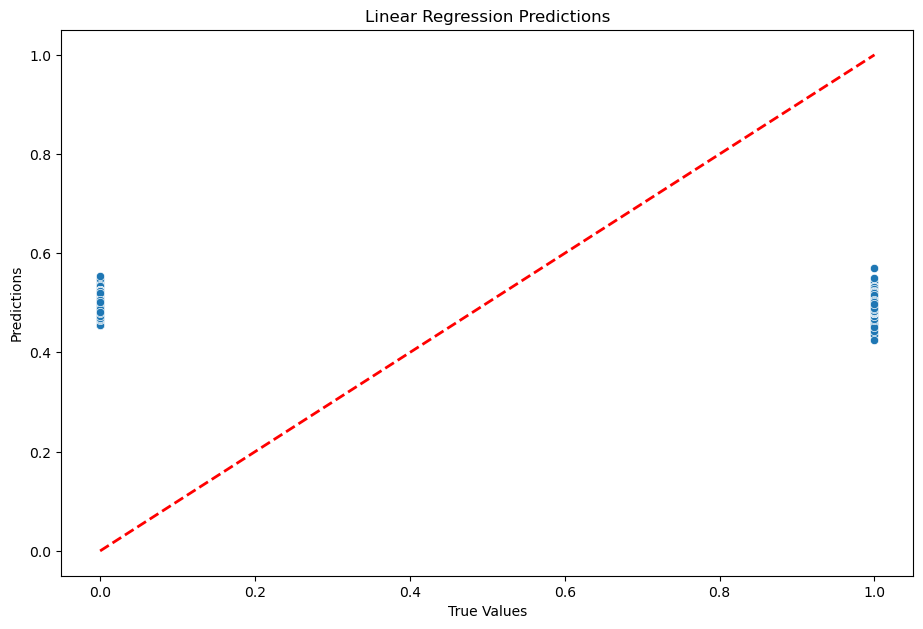

In [46]:
# Visualization of the results
plt.figure(figsize=(18, 12))

# Linear Regression Predictions
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_lr)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Linear Regression Predictions')


plt.tight_layout()
plt.show()

# Random Forest Graph

Text(0.5, 1.0, 'Random Forest Predictions')

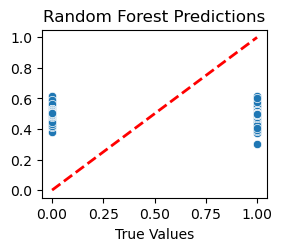

In [47]:
# Random Forest Predictions
plt.subplot(2, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.title('Random Forest Predictions')

# Gradient Boosting Predictions Graph

Text(0.5, 1.0, 'Gradient Boosting Predictions')

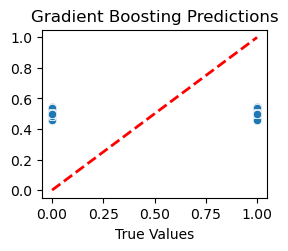

In [48]:
# Gradient Boosting Predictions
plt.subplot(2, 2, 3)
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.title('Gradient Boosting Predictions')

# AdaBoost Predictions Graph

Text(0.5, 1.0, 'AdaBoost Predictions')

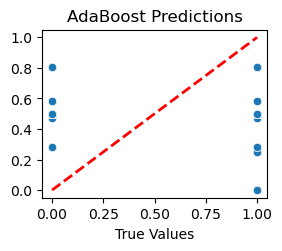

In [50]:
# AdaBoost Predictions
plt.subplot(2, 2, 4)
sns.scatterplot(x=y_test, y=y_pred_ab)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.title('AdaBoost Predictions')

/Users/zeshan/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


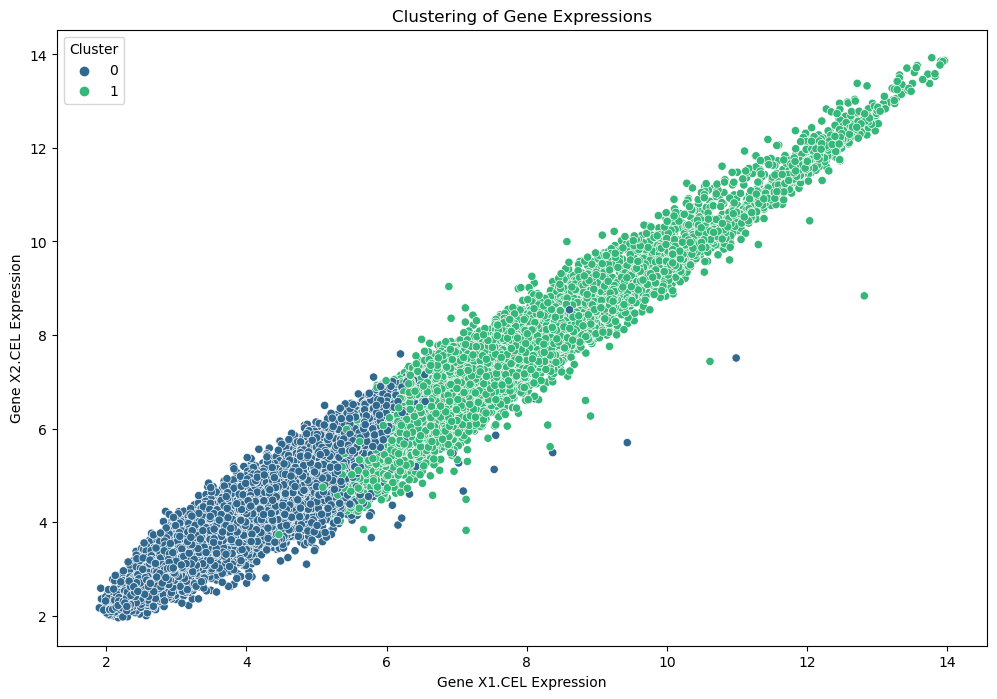

,X1.CEL,X10.CEL,X11.CEL,X12.CEL,X13.CEL,X14.CEL,X15.CEL,X16.CEL,X17.CEL,X18.CEL,...,X2.CEL,X20.CEL,X3.CEL,X4.CEL,X5.CEL,X6.CEL,X7.CEL,X8.CEL,X9.CEL,Cluster
11715100_at,4.910698,4.155685,4.088218,4.000970,3.839209,3.796522,3.744408,4.401068,3.744605,4.175924,...,4.757387,4.203475,4.994587,5.161641,4.180856,3.921129,4.507485,4.719071,3.994982,0
11715101_s_at,7.116163,6.700438,6.531448,6.426322,6.167636,6.264664,6.393983,6.885255,6.165253,6.041182,...,7.549855,6.370912,7.376626,7.645856,7.069460,6.530064,7.058121,7.953475,6.410618,1
11715102_x_at,4.767127,4.212240,4.013923,4.011976,3.778939,3.762108,3.839009,4.432945,4.010863,4.054125,...,4.987592,4.151917,4.870604,5.274334,4.464598,4.078651,4.601269,4.739102,4.024305,0
11715103_x_at,5.394218,5.132054,5.367695,5.318522,5.797511,5.364685,5.345365,5.463888,5.300243,5.696798,...,5.618655,5.614311,5.614563,6.101941,5.584576,5.359894,5.623862,5.741161,5.132938,0
11715104_s_at,6.085474,5.579341,5.106184,5.202225,4.932371,5.032518,5.374510,5.944778,4.948527,4.930927,...,6.669939,5.189793,6.397308,6.798732,6.143295,5.511504,6.079674,7.277054,5.415568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERCC-00168-01_at,2.849836,2.698310,2.502351,2.467758,2.546129,2.580397,2.540730,2.754620,2.586265,2.522718,...,2.810902,2.457997,3.017398,3.205125,2.674870,2.700116,2.882481,3.199340,2.542911,0
ERCC-00170-01_at,2.449851,2.409717,2.426028,2.265732,2.374807,2.340888,2.368380,2.280695,2.472885,2.562116,...,2.516274,2.419215,2.548082,2.662005,2.506330,2.364254,2.633243,2.519955,2.379074,0
ERCC-00171-01_at,3.070683,2.870975,2.735031,2.807274,2.795962,2.789847,2.640667,3.039611,2.696238,2.771087,...,3.081552,2.699530,2.995890,3.466074,3.141903,3.010147,3.114334,3.553765,2.786057,0
ERCC-00172-01_at,3.207477,2.866111,2.768886,2.877083,2.773826,2.753977,2.710193,3.247367,2.974621,2.823492,...,3.674112,2.763178,3.150180,3.732281,3.043058,2.929722,3.282267,3.268584,2.943299,0


In [51]:
from sklearn.cluster import KMeans
df=X
# K-Means Clustering on gene expression data (20 samples, 49995 genes)
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters: one possibly cancerous, one non-cancerous
cluster_labels = kmeans.fit_predict(df)  # Cluster assignments

# Add cluster labels to the dataframe
df['Cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df['X1.CEL'], y=df['X2.CEL'], hue=df['Cluster'], palette='viridis')
plt.title('Clustering of Gene Expressions')
plt.xlabel('Gene X1.CEL Expression')
plt.ylabel('Gene X2.CEL Expression')
plt.show()
df